In [ ]:
PROJECT --> PYTHON + MYSQL

In [ ]:
Bussiness understanding --- Analyse the data using sql and visualise the data using python libraries

In [ ]:
Target is a globally recognized brand and a leading retailer in the United States, known for offering exceptional value,
inspiration, innovation, and a unique shopping experience.

This dataset focuses on Target's operations in Brazil, covering 100,000 orders placed between 2016 and 2018. It includes
detailed information on order status, pricing, payment and shipping performance, customer locations, product attributes, and 
customer reviews.

In [4]:
import mysql.connector

In [ ]:
pip install mysql-connector-python

In [ ]:
import os

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('sellers.csv','sellers'),
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_items'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database  # me --> kuki csv file ko dump karna hai sql mai
# me -> har ek csv file kai andar lakhs of data --> so har ek file ko manually call  karenge toh it will take a lot of time  --> that why utilisizing python to dump csv file to mysql  
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='sks2003@@@',
    database='ecommerce'
)
cursor = conn.cursor() # database kai andar database ko activate kiya hai

# Folder containing the CSV files
folder_path = 'C:/Users/sahus/OneDrive/Desktop/ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]
    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)
 # Commit the transaction for the current CSV file
    conn.commit()
# Close the connection
conn.close()

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value        

In [ ]:
replace nan values

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
import mysql.connector

In [7]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='sks2003@@@',
    database='ecommerce'
)
curs = db.cursor()

#  Count the number of orders placed in 2018.

In [66]:
query_written=""" select count(*) from orders where year(order_purchase_timestamp)='2018';
  """
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
print(data)
data[0][0]


[(108022,)]


108022

# List all unique cities where customers are located.

In [8]:
query_written=""" select distinct customer_city from customers """
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data
# distinct is not a function here it is a keyword here

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Calculate the percentage of orders that were paid in installments.


In [67]:
query_written=""" SELECT 
    COUNT(*) * 100 / (SELECT 
            COUNT(order_id)
        FROM
            payments)
FROM
    ecommerce.payments
WHERE
    payment_installments > 0 """
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data[0][0]


Decimal('99.9981')

# Find the total sales per category.

In [11]:
query_written=""" select 
    t1.product_category, round(SUM(payment_value),3)
from
    products t1
        join
    order_items t2 on t1.product_id = t2.product_id
        join
    payments t3 on t2.order_id = t3.order_id
group by t1.product_category """
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('perfumery', 4053909.279),
 ('Furniture Decoration', 11441411.134),
 ('telephony', 3895056.406),
 ('Fashion Bags and Accessories', 1745266.24),
 ('bed table bath', 13700429.368),
 ('automotive', 6818354.649),
 ('computer accessories', 12682643.57),
 ('housewares', 8758065.042),
 ('babies', 4318765.278),
 ('toys', 4952301.516),
 ('Furniture office', 5174611.897),
 ('Cool Stuff', 6237584.0),
 ('HEALTH BEAUTY', 13258984.955),
 ('pet Shop', 2490151.762),
 ('General Interest Books', 517558.077),
 ('stationary store', 2539520.557),
 ('Watches present', 11433733.429),
 ('PCs', 2232972.395),
 ('climatization', 729365.276),
 ('Construction Tools Construction', 1931805.042),
 ('sport leisure', 11137020.473),
 ('Bags Accessories', 1497210.323),
 ('electronics', 2078856.797),
 ('Casa Construcao', 1093162.322),
 ('Games consoles', 1563843.033),
 ('home appliances', 764258.159),
 ('Garden tools', 6706246.006),
 ('Agro Industria e Comercio', 949844.884),
 (None, 2022413.681),
 ('audio', 482596.961)

In [12]:
# creating data frame for this 
df1=pd.DataFrame(data,columns=['category','sales'])
df1

,category,sales
0,perfumery,4.053909e+06
1,Furniture Decoration,1.144141e+07
2,telephony,3.895056e+06
3,Fashion Bags and Accessories,1.745266e+06
4,bed table bath,1.370043e+07
...,...,...
69,cds music dvds,9.595440e+03
70,La Cuisine,2.330824e+04
71,Fashion Children's Clothing,6.285360e+03
72,PC Gamer,1.739544e+04


In [13]:
#Top 5 products
df1.sort_values(by='sales',ascending=False)


,category,sales
4,bed table bath,1.370043e+07
12,HEALTH BEAUTY,1.325898e+07
6,computer accessories,1.268264e+07
1,Furniture Decoration,1.144141e+07
16,Watches present,1.143373e+07
...,...,...
72,PC Gamer,1.739544e+04
66,House Comfort 2,1.368432e+04
69,cds music dvds,9.595440e+03
71,Fashion Children's Clothing,6.285360e+03


In [14]:
df2=df1.sort_values(by='sales',ascending=False).head(5)
df2

,category,sales
4,bed table bath,1.370043e+07
12,HEALTH BEAUTY,1.325898e+07
6,computer accessories,1.268264e+07
1,Furniture Decoration,1.144141e+07
16,Watches present,1.143373e+07


<Axes: xlabel='category'>

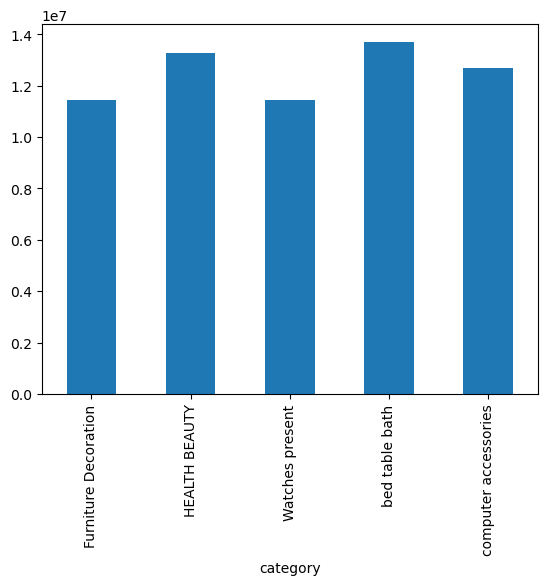

In [15]:
df2.groupby('category')['sales'].sum().plot(kind='bar')

# Count the number of customers from each state. 

In [19]:
query_written=""" select customer_state,count(*) from customers group by customer_state"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

In [20]:
# creating data frame for this 
df3=pd.DataFrame(data,columns=['state','customers_counts'])
df3

,state,customers_counts
0,SP,83492
1,SC,7274
2,MG,23270
3,PR,10090
4,RJ,25704
5,RS,10932
6,PA,1950
7,GO,4040
8,ES,4066
9,BA,6760


In [21]:
df4=df3.sort_values(by='customers_counts',ascending=False)
df4

,state,customers_counts
0,SP,83492
4,RJ,25704
2,MG,23270
5,RS,10932
3,PR,10090
1,SC,7274
9,BA,6760
13,DF,4280
8,ES,4066
7,GO,4040


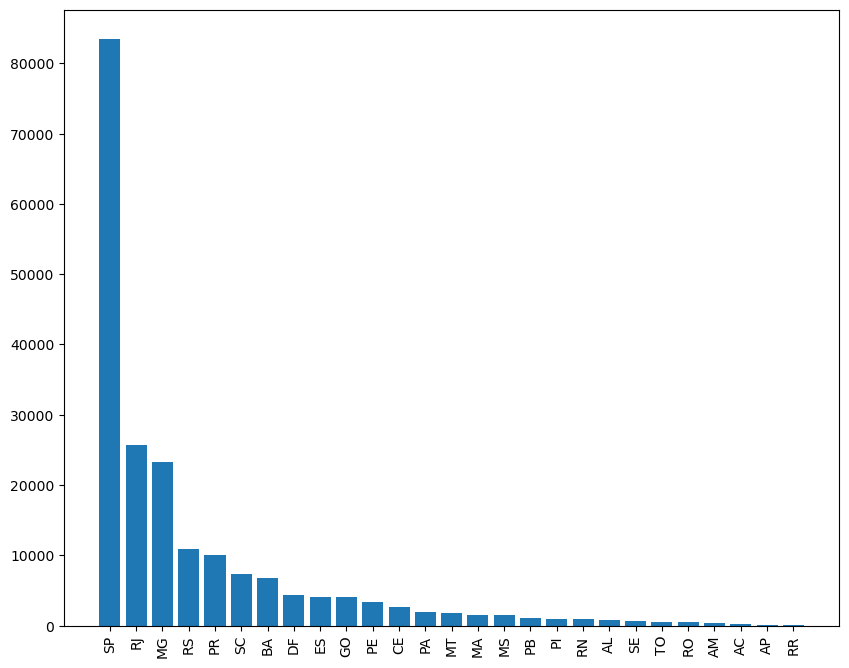

In [22]:
plt.figure(figsize=(10,8))
plt.bar(df4['state'],df4['customers_counts'])
plt.xticks(rotation='vertical')
plt.show()

# Find the average number of products per order, grouped by customer city.

In [81]:
query_written="""with cte as(SELECT t1.order_id,t1.customer_id,count(t2.order_id) as order_count FROM orders t1 join 
order_items t2 on t1.order_id=t2.order_id group by t1.order_id,t1.customer_id)

SELECT 
    t3.customer_city, ROUND(AVG(cte.order_count), 2)
FROM
    customers t3
        JOIN
    cte ON t3.customer_id = cte.customer_id
GROUP BY t3.customer_city; """
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('sao jose dos campos', Decimal('4.55')),
 ('indaial', Decimal('4.46')),
 ('treze tilias', Decimal('5.09')),
 ('sao paulo', Decimal('4.62')),
 ('rio de janeiro', Decimal('4.59')),
 ('mario campos', Decimal('5.33')),
 ('guariba', Decimal('4.00')),
 ('cuiaba', Decimal('4.79')),
 ('franca', Decimal('5.01')),
 ('tocos', Decimal('4.00')),
 ('januaria', Decimal('4.73')),
 ('embu-guacu', Decimal('4.96')),
 ('cerquilho', Decimal('4.67')),
 ('belo horizonte', Decimal('4.57')),
 ('taubate', Decimal('4.54')),
 ('arcos', Decimal('4.48')),
 ('monte mor', Decimal('4.31')),
 ('vianopolis', Decimal('5.33')),
 ('sao jose da tapera', Decimal('4.00')),
 ('belford roxo', Decimal('4.36')),
 ('pedro leopoldo', Decimal('5.00')),
 ('arroio do sal', Decimal('5.14')),
 ('sao bernardo do campo', Decimal('4.57')),
 ('brasilia', Decimal('4.52')),
 ('ribeirao pires', Decimal('4.49')),
 ('contagem', Decimal('4.58')),
 ('feira de santana', Decimal('4.26')),
 ('fortaleza', Decimal('4.48')),
 ('piracicaba', Decimal('4

In [82]:
# creating data frame for this 
df6=pd.DataFrame(data,columns=['city','avg_of_orders_per_order'])
df6


,city,avg_of_orders_per_order
0,sao jose dos campos,4.55
1,indaial,4.46
2,treze tilias,5.09
3,sao paulo,4.62
4,rio de janeiro,4.59
...,...,...
4105,sambaiba,4.00
4106,guairaca,8.00
4107,japaratuba,4.00
4108,tuiuti,4.00


In [71]:
df7=df6.sort_values(by='avg_of_orders_per_order',ascending=False).head(5)
df7

,city,avg_of_orders_per_order
2826,padre carvalho,28.00
1931,celso ramos,26.00
2394,datas,24.00
3935,candido godoi,24.00
3993,matias olimpio,20.00


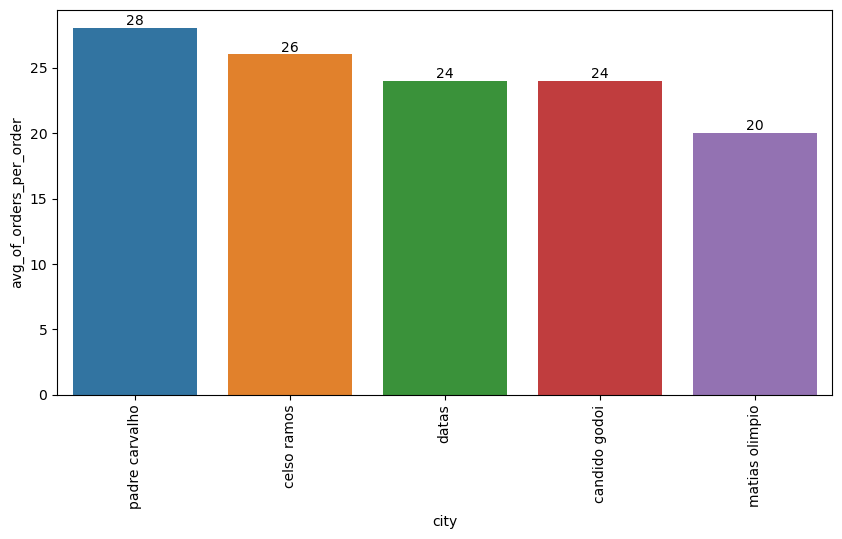

In [95]:
plt.figure(figsize=(10,5))
gem=sns.barplot(x='city',y='avg_of_orders_per_order',data=df7)
plt.xticks(rotation='vertical')
gem.bar_label(gem.containers[0])
plt.show()

# Calculate the number of orders per month in 2018.

In [83]:
query_written=""" select monthname(order_purchase_timestamp),count(*) from orders where year(order_purchase_timestamp)='2018' group by monthname(order_purchase_timestamp)"""
curs.execute(query_written)
data=curs.fetchall()  
data

[('July', 12584),
 ('August', 13024),
 ('February', 13456),
 ('June', 12334),
 ('March', 14422),
 ('January', 14538),
 ('May', 13746),
 ('April', 13878),
 ('September', 32),
 ('October', 8)]

In [84]:
a=pd.DataFrame(data,columns=['month','number_of_orders'])  # creating data frame for this 
a

,month,number_of_orders
0,July,12584
1,August,13024
2,February,13456
3,June,12334
4,March,14422
5,January,14538
6,May,13746
7,April,13878
8,September,32
9,October,8


In [85]:
b=a.sort_values(by='number_of_orders',ascending=False)
b

,month,number_of_orders
5,January,14538
4,March,14422
7,April,13878
6,May,13746
2,February,13456
1,August,13024
0,July,12584
3,June,12334
8,September,32
9,October,8


In [28]:
import calendar
list_of_month=list(calendar.month_name)[1:]
list_of_month

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

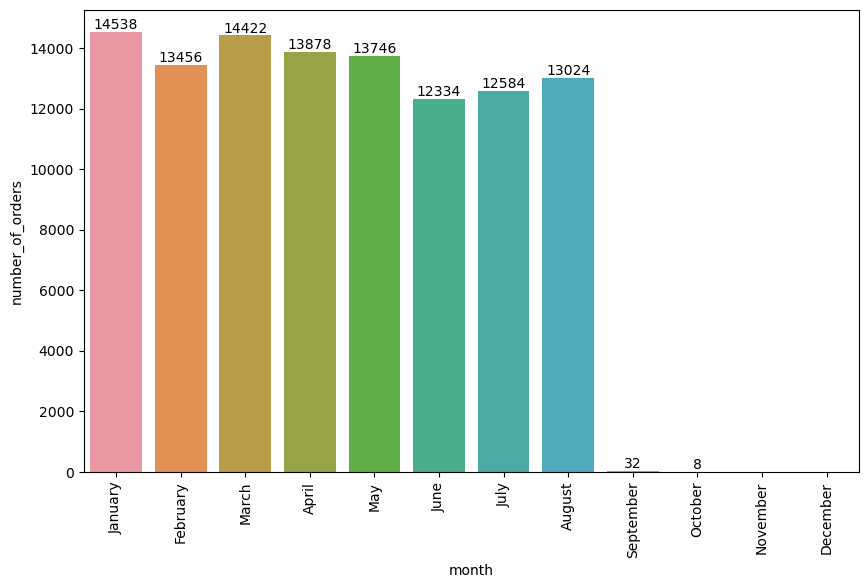

In [96]:
plt.figure(figsize=(10,6))
gem=sns.barplot(x=b['month'],y=b['number_of_orders'],data=b,order=list_of_month)
plt.xticks(rotation='vertical')
gem.bar_label(gem.containers[0])
plt.show()

# Calculate the percentage of total revenue contributed by each product category.


In [87]:
query_written=""" select 
    t1.product_category, (SUM(payment_value)*100/(select SUM(payment_value) from payments) ) as revenue
from
    products t1
        join
    order_items t2 on t1.product_id = t2.product_id
        join
    payments t3 on t2.order_id = t3.order_id
group by t1.product_category
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('perfumery', 12.661445630745858),
 ('Furniture Decoration', 35.73459469352589),
 ('telephony', 12.165305514626265),
 ('Fashion Bags and Accessories', 5.450934416518956),
 ('bed table bath', 42.790114335610106),
 ('automotive', 21.29554973601325),
 ('computer accessories', 39.61129639538551),
 ('housewares', 27.353785377857992),
 ('babies', 13.488661929124701),
 ('toys', 15.46736546677517),
 ('Furniture office', 16.161700394576144),
 ('Cool Stuff', 19.481647281620265),
 ('HEALTH BEAUTY', 41.41136507217919),
 ('pet Shop', 7.777411624432495),
 ('General Interest Books', 1.6164726441752517),
 ('stationary store', 7.931603607754194),
 ('Watches present', 35.71061516075281),
 ('PCs', 6.974171503720929),
 ('climatization', 2.278003317237025),
 ('Construction Tools Construction', 6.033545110433961),
 ('sport leisure', 34.78390104461034),
 ('Bags Accessories', 4.676189277584074),
 ('electronics', 6.492827170468856),
 ('Casa Construcao', 3.4142390364992243),
 ('Games consoles', 4.8843010965268

In [33]:
# creating data frame for this 
df8=pd.DataFrame(data,columns=['category','revenue_percent_by category'])
df8

,category,revenue_percent_by category
0,perfumery,12.661446
1,Furniture Decoration,35.734595
2,telephony,12.165306
3,Fashion Bags and Accessories,5.450934
4,bed table bath,42.790114
...,...,...
69,cds music dvds,0.029969
70,La Cuisine,0.072798
71,Fashion Children's Clothing,0.019631
72,PC Gamer,0.054331


In [34]:
df9=df8.sort_values(by='revenue_percent_by category',ascending=False).head(5)
df9

,category,revenue_percent_by category
4,bed table bath,42.790114
12,HEALTH BEAUTY,41.411365
6,computer accessories,39.611296
1,Furniture Decoration,35.734595
16,Watches present,35.710615


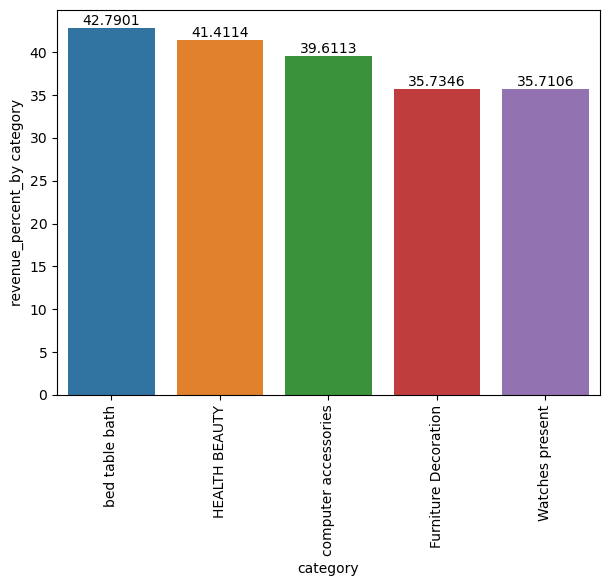

In [103]:
plt.figure(figsize=(7,5))
gem=sns.barplot(x='category',y='revenue_percent_by category',data=df9)
plt.xticks(rotation='vertical')
gem.bar_label(gem.containers[0])
plt.show()

# Identify the correlation between product price and the number of times a product has been purchased.

In [37]:
query_written="""SELECT 
    t1.product_category,
    COUNT(*) AS no_of_times,
    ROUND(AVG(t2.price), 2) AS product_price
FROM
    products t1
        JOIN
    order_items t2 ON t1.product_id = t2.product_id
GROUP BY t1.product_category;
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('HEALTH BEAUTY', 38680, 130.16),
 ('sport leisure', 34564, 114.34),
 ('Cool Stuff', 15184, 167.36),
 ('computer accessories', 31308, 116.51),
 ('Watches present', 23964, 201.14),
 ('housewares', 27856, 90.79),
 ('electronics', 11068, 57.91),
 (None, 6412, 112.0),
 ('toys', 16468, 117.55),
 ('bed table bath', 44460, 93.3),
 ('Games consoles', 4548, 138.49),
 ('automotive', 16940, 139.96),
 ('Furniture Decoration', 33336, 87.56),
 ('home appliances', 3084, 103.98),
 ('telephony', 18180, 71.21),
 ('Construction Tools Construction', 3716, 155.73),
 ('perfumery', 13676, 116.74),
 ('stationary store', 10068, 91.75),
 ('Room Furniture', 2012, 137.01),
 ('Fashion Bags and Accessories', 8124, 75.25),
 ('Garden tools', 17388, 111.63),
 ('Fashion Underwear and Beach Fashion', 524, 72.84),
 ('pet Shop', 7788, 110.07),
 ('SIGNALIZATION AND SAFETY', 796, 108.09),
 ('ELECTRICES 2', 952, 476.12),
 ("Fashion Women's Clothing", 192, 58.41),
 ('Bags Accessories', 4368, 128.6),
 ('General Interest Books

In [38]:
# creating data frame for this 
df10=pd.DataFrame(data,columns=['category','no_of_times','product_price'])
df10

,category,no_of_times,product_price
0,HEALTH BEAUTY,38680,130.16
1,sport leisure,34564,114.34
2,Cool Stuff,15184,167.36
3,computer accessories,31308,116.51
4,Watches present,23964,201.14
...,...,...,...
69,flowers,132,33.64
70,Kitchen portable and food coach,60,264.57
71,CITTE AND UPHACK FURNITURE,152,114.95
72,House Comfort 2,120,25.34


In [39]:
df10[['no_of_times','product_price']].corr()
# no correlation(near to 0)

,no_of_times,product_price
no_of_times,1.000000,-0.106315
product_price,-0.106315,1.000000


In [40]:
df11=df10.sort_values(by='product_price',ascending=False).head(5)
df11

,category,no_of_times,product_price
30,PCs,812,1098.34
29,HOUSE PASTALS OVEN AND CAFE,304,624.29
24,ELECTRICES 2,952,476.12
53,Agro Industria e Comercio,848,342.12
33,musical instruments,2720,281.62


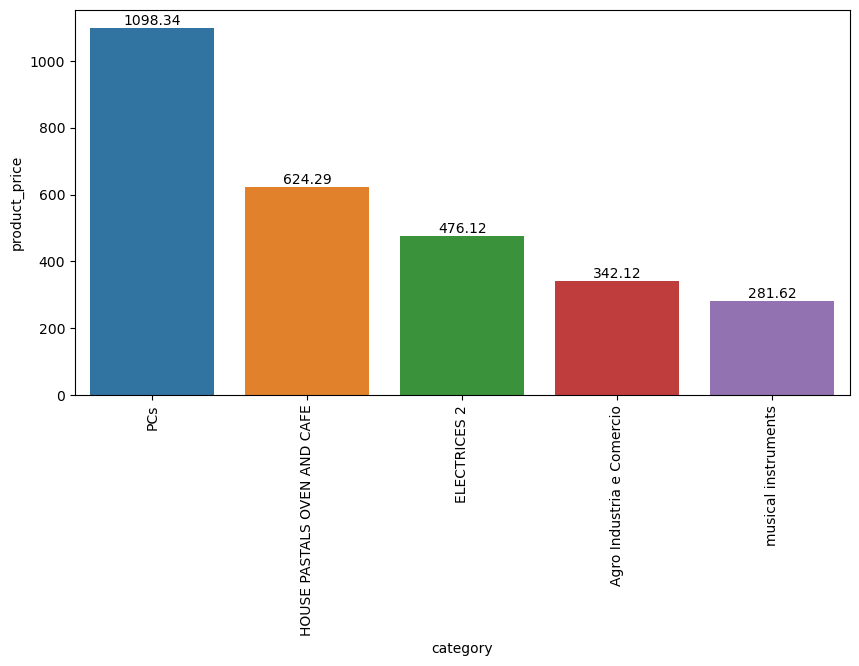

In [106]:
plt.figure(figsize=(10,5))
gem=sns.barplot(x='category',y='product_price',data=df11)
plt.xticks(rotation='vertical')
gem.bar_label(gem.containers[0])
plt.show()

# Calculate the total revenue generated by each seller, and rank them by revenue.


In [108]:
query_written="""select t1.seller_id,sum(t3.payment_value) as revenue,rank() over(order by sum(t3.payment_value) desc) 
from order_items t1 join sellers t2 
on  t1.seller_id=t2.seller_id 
join payments t3 on t3.order_id=t1.order_id group by t2.seller_id 
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[('7c67e1448b00f6e969d365cea6b010ab', 4057335.2584171295, 1),
 ('1025f0e2d44d7041d6cf58b6550e0bfa', 2465776.3187217712, 2),
 ('4a3ca9315b744ce9f8e9374361493884', 2409962.158122301, 3),
 ('1f50f920176fa81dab994f9023523100', 2322027.3610209227, 4),
 ('53243585a1d6dc2643021fd1853d8905', 2279224.6439819336, 5),
 ('da8622b14eb17ae2831f4ac5b9dab84a', 2177754.554517269, 6),
 ('4869f7a5dfa277a7dca6462dcf3b52b2', 2113328.9675102234, 7),
 ('955fee9216a65b617aa5c0531780ce60', 1890578.404018119, 8),
 ('fa1c13f2614d7b5c4749cbc52fecda94', 1652105.8389587402, 9),
 ('7e93a43ef30c4f03f38b393420bc753a', 1481073.6776504517, 10),
 ('6560211a19b47992c3666cc44a7e94c0', 1437261.9923866987, 11),
 ('7a67c85e85bb2ce8582c35f2203ad736', 1352246.400204897, 12),
 ('25c5c91f63607446a97b143d2d535d31', 1284277.9181804657, 13),
 ('a1043bafd471dff536d0c462352beb48', 1234855.281513214, 14),
 ('46dc3b2cc0980fb8ec44634e21d2718e', 1190914.720565796, 15),
 ('b37c4c02bda3161a7546a4e6d222d5b2', 1162552.3210449219, 16),
 ('620c

In [109]:
# creating data frame for this 
df12=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df12

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,4.057335e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,2.465776e+06,2
2,4a3ca9315b744ce9f8e9374361493884,2.409962e+06,3
3,1f50f920176fa81dab994f9023523100,2.322027e+06,4
4,53243585a1d6dc2643021fd1853d8905,2.279225e+06,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,1.536800e+02,3091
3091,702835e4b785b67a084280efca355756,1.484800e+02,3092
3092,4965a7002cca77301c82d3f91b82e1a9,1.308800e+02,3093
3093,77128dec4bec4878c37ab7d6169d6f26,1.217600e+02,3094


In [110]:
df13=df12.sort_values(by='rank').head(5)
df13

,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,4.057335e+06,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,2.465776e+06,2
2,4a3ca9315b744ce9f8e9374361493884,2.409962e+06,3
3,1f50f920176fa81dab994f9023523100,2.322027e+06,4
4,53243585a1d6dc2643021fd1853d8905,2.279225e+06,5


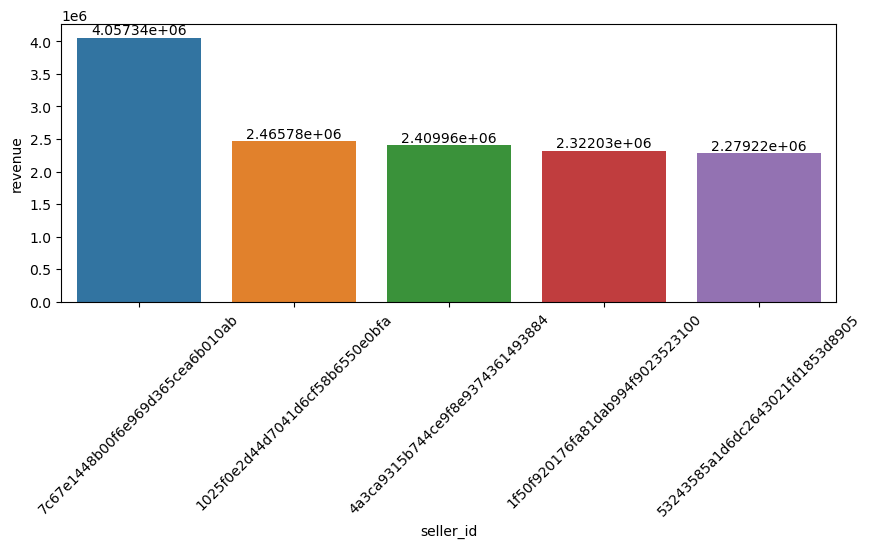

In [115]:
plt.figure(figsize=(10,3.6))
gem=sns.barplot(x='seller_id',y='revenue',data=df13)
plt.xticks(rotation=45)
gem.bar_label(gem.containers[0])
plt.show()


# Identify the top 3 customers who spent the most money in each year.

In [73]:
query_written="""with cte as (select t1.customer_id,year(order_purchase_timestamp) as year,sum(payment_value) as money_spent
from customers t1 join orders t2 on t1.customer_id=t2.customer_id join payments t3 
on t3.order_id=t2.order_id group by t1.customer_id,year(order_purchase_timestamp))
select * from(
select *,dense_rank() over(partition by year order by money_spent desc) as ran from cte) a 
where ran<=3
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data

[('a9dc96b027d1252bbac0a9b72d837fc6', 2016, 11388.400390625, 1),
 ('1d34ed25963d5aae4cf3d7f3a4cda173', 2016, 11205.919921875, 2),
 ('4a06381959b6670756de02e07b83815f', 2016, 9822.240234375, 3),
 ('1617b1357756262bfa56ab541c47bc16', 2017, 109312.640625, 1),
 ('c6e2731c5b391845f6800c97401a43a9', 2017, 55434.48046875, 2),
 ('3fd6777bbce08a352fddd04e4a7cc8f6', 2017, 53813.28125, 3),
 ('ec5b2ba62e574342386871631fafd3fc', 2018, 58199.0390625, 1),
 ('f48d464a0baaea338cb25f816991ab1f', 2018, 55377.6796875, 2),
 ('e0a2412720e9ea4f26c1ac985f6a7358', 2018, 38475.51953125, 3)]

In [74]:
# creating data frame for this 
df16=pd.DataFrame(data,columns=['customer_id','year','money_spended','rank'])
df16

,customer_id,year,money_spended,rank
0,a9dc96b027d1252bbac0a9b72d837fc6,2016,11388.400391,1
1,1d34ed25963d5aae4cf3d7f3a4cda173,2016,11205.919922,2
2,4a06381959b6670756de02e07b83815f,2016,9822.240234,3
3,1617b1357756262bfa56ab541c47bc16,2017,109312.640625,1
4,c6e2731c5b391845f6800c97401a43a9,2017,55434.480469,2
5,3fd6777bbce08a352fddd04e4a7cc8f6,2017,53813.281250,3
6,ec5b2ba62e574342386871631fafd3fc,2018,58199.039062,1
7,f48d464a0baaea338cb25f816991ab1f,2018,55377.679688,2
8,e0a2412720e9ea4f26c1ac985f6a7358,2018,38475.519531,3


In [75]:
df17=df16.sort_values(by='rank').head(5)

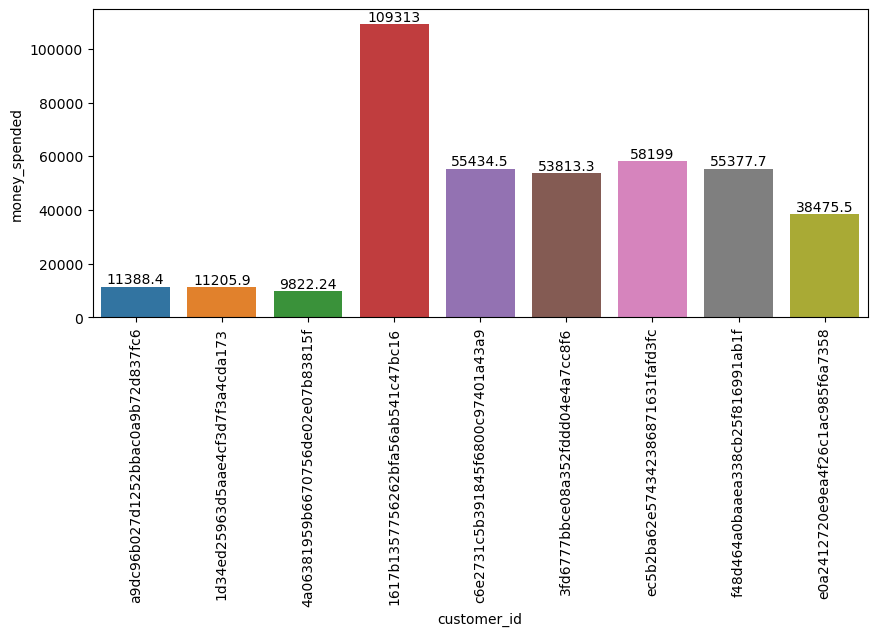

In [118]:
plt.figure(figsize=(10,4))
gem=sns.barplot(x='customer_id',y='money_spended',data=df16)
plt.xticks(rotation='vertical')
gem.bar_label(gem.containers[0])
plt.show()

In [ ]:
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

##  Calculate the moving average of order values for each customer over their order history.

In [48]:
query_written="""select customer_id,order_purchase_timestamp,avg(payment_value) 
over (partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as moving_average
from
(select t1.customer_id,t1.order_purchase_timestamp,t2.payment_value
 from orders t1 join payments t2
on t1.order_id=t2.order_id) as a
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data
# moving average 3 orders kai basis par

[('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('00012a2ce6f8dcda20d059ce98491703',
  '2017-11-14 16:08:26',
  114.73999786376953),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('000161a058600d5901f007fab4c27140',
  '2017-07-16 09:40:32',
  67.41000366210938),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43',
  195.4199981689453),
 ('0001fd6190edaaf884bcaf3d49edf079',
  '2017-02-28 11:06:43'

In [49]:
# creating data frame for this 
df13=pd.DataFrame(data,columns=['customer_id','order_purchase_timestamp','moving_average'])
df13

,customer_id,order_purchase_timestamp,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
...,...,...,...
415539,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000
415540,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415541,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001
415542,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.370001


#  Calculate the cumulative sales per month for each year.

In [89]:
query_written="""select years,months,sales,sum(sales) over (order by years,months) as cumulative_sales from
(select year(t1.order_purchase_timestamp) as years,month(t1.order_purchase_timestamp) as months,sum(payment_value) as sales
 from orders t1 join payments t2
on t1.order_id=t2.order_id 
group by month(t1.order_purchase_timestamp),
year(t1.order_purchase_timestamp) order by years,months) a
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[(2016, 9, 1008.9599761962891, 1008.9599761962891),
 (2016, 10, 236361.91999721527, 237370.87997341156),
 (2016, 12, 78.4800033569336, 237449.3599767685),
 (2017, 1, 553952.1602566242, 791401.5202333927),
 (2017, 2, 1167632.0380285978, 1959033.5582619905),
 (2017, 3, 1799454.398112893, 3758487.9563748837),
 (2017, 4, 1671152.1179949045, 5429640.074369788),
 (2017, 5, 2371675.2805453315, 7801315.35491512),
 (2017, 6, 2045105.5213148594, 9846420.87622998),
 (2017, 7, 2369531.6779482365, 12215952.554178216),
 (2017, 8, 2697585.279718928, 14913537.833897144),
 (2017, 9, 2911049.8016270995, 17824587.635524243),
 (2017, 10, 3118711.518942073, 20943299.154466316),
 (2017, 11, 4779531.198865019, 25722830.353331335),
 (2017, 12, 3513605.9194849133, 29236436.27281625),
 (2018, 1, 4460016.716655076, 33696452.989471324),
 (2018, 2, 3969853.3606585264, 37666306.35012985),
 (2018, 3, 4638608.478623927, 42304914.82875378),
 (2018, 4, 4643141.922741748, 46948056.751495525),
 (2018, 5, 4615928.60435055

In [90]:
# creating data frame for this 
a=pd.DataFrame(data,columns=['year','month','sales','cumulatative_sales'])
a

,year,month,sales,cumulatative_sales
0,2016,9,1.008960e+03,1.008960e+03
1,2016,10,2.363619e+05,2.373709e+05
2,2016,12,7.848000e+01,2.374494e+05
3,2017,1,5.539522e+05,7.914015e+05
4,2017,2,1.167632e+06,1.959034e+06
5,2017,3,1.799454e+06,3.758488e+06
6,2017,4,1.671152e+06,5.429640e+06
7,2017,5,2.371675e+06,7.801315e+06
8,2017,6,2.045106e+06,9.846421e+06
9,2017,7,2.369532e+06,1.221595e+07


# Calculate the retention rate of customers,defined as the percentage of customers who make another purchase within 12 months of their first purchase.


In [93]:

query_written="""with cte as (select t1.customer_id ,min(t2.order_purchase_timestamp) ordered_first_time from customers t1
join orders t2 on 
t1.customer_id=t2.customer_id
group by t1.customer_id)
select cte.customer_id,count(distinct t3.order_purchase_timestamp) from cte join orders t3
on t3.customer_id=cte.customer_id
and t3.order_purchase_timestamp>ordered_first_time
and t3.order_purchase_timestamp<date_add(ordered_first_time,interval 12 month)
group by cte.customer_id"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data
data


[]

#  Calculate the year-over-year growth rate of total sales.

In [126]:
query_written="""select *,((sales - previous_month_sales)/(previous_month_sales))*100 from(select *,lag(sales) over 
(order by sales) as previous_month_sales from
(select year(t1.order_purchase_timestamp) as years,sum(payment_value) as sales
 from orders t1 join payments t2
on t1.order_id=t2.order_id 
group by year(t1.order_purchase_timestamp) order by years) as a)as b
"""
curs.execute(query_written)
data=curs.fetchall()  # from cursor it will fetch all data


In [127]:
data

[(2016, 237449.3599767685, None, None),
 (2017, 28998986.91283948, 237449.3599767685, 12112.70375952021),
 (2018, 34799052.207403116, 28998986.91283948, 20.00092386674247)]

In [129]:
# creating data frame for this 
a=pd.DataFrame(data,columns=['year','sales','previous_month_sales','percent_of_growth_compared_to_last_month'])


In [128]:
a

,year,sales,previous_month_sales,percent_of_growth_compared_to_last_month
0,2016,2.374494e+05,NaN,NaN
1,2017,2.899899e+07,2.374494e+05,12112.703760
2,2018,3.479905e+07,2.899899e+07,20.000924


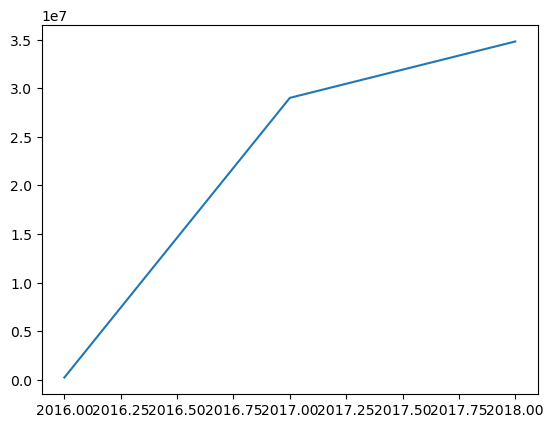

In [125]:
plt.plot(a['year'],a['sales'])

In [ ]:
Calculate the retention rate of customers,defined as the percentage of customers who make another purchase within 12 months of their first purchase.

In [ ]:
kaise csv file ko dump kar sakte hai in sql using pyton
how we can retrieve data from sql using python and create charts out of it 
koi bhi data hummne python mai import nhi kiya hai sql ki queries kai sath data laa rahe hai usse dataframe,charts jo bhi required hai vo create kar rahe hai


Target is a globally recognized brand and a leading retailer in the United States, known for offering exceptional value, inspiration, innovation, and a unique shopping experience.

This dataset focuses on Target's operations in Brazil, covering 100,000 orders placed between 2016 and 2018. It includes detailed information on order status, pricing, payment and shipping performance, customer locations, product attributes, and customer reviews.



Potential Use Cases
Analyzing this dataset offers valuable insights into Target's Brazilian operations, revealing details about order processing, pricing strategies, payment and shipping efficiency, customer demographics, product characteristics, and customer satisfaction. This comprehensive dataset is a valuable resource for understanding various business aspects and enhancing strategic decision-making.\

In [ ]:
# the benefit to bring the data here is we will make dataframe and if have some data where we can plot something and we can plot chart here.
so it will a combination of analysis(from sql - real time analysis) and visualization(python)

In [ ]:
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2018.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

Advanced Queries
1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.